<a href="https://colab.research.google.com/github/sourabh111dotcom/2nd-CAPSTONE-RETAIL-SALES-PREDICTION/blob/main/ROSSMANN_SALES_PREDICTION_SC_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - RETAIL SALES PREDICTION- ROSSMANN 



##### **Project Type**    - Regression
##### **Contribution**    - Individual - SOURABH CHOUDHARY


# **Project Summary -**

We have been given historical data of Rossman stores which included several factors which affects the sales of the stores which includes several factors like Promotion, State holiday, School holiday and etc.The process followed:
1. Analysed the data- The number of rows and columns it had,type of the features presented,the kind of data each particular feature had,checked for duplicated or missing values.
2. Data manipulation- Checked for outliers and null values and fiixed it with the necessary operations.
3. Data Visualiztion - plotted various graphs and like customers,state holiday,school holiday,types of stores etc. charts to find out their affect on sales.Also plotted heatmap to find the correlation between different features.
4. Perfomed various hypothesis testing to get the select the correct hypothesis based on different types of test.
5. Data Pre-processing and feature selection- Treated categorical values and performed encoding. Dropped the unnecessary columns and rows.
6. Model Implementation - 2 model have been created:Model 1 with the pre-processed data that have selected features and rows and Model 2 having all the data.
7. ML algorithms that were performed were - Linear Regression,Decision Tree, Decision Tree with Hyperparameter tuning and Random forest.
8. In both the models Random Forest performed the best whereas while comparing both models it was found out that Model 2 was performing better than Model 1.
9. It can be seen that while droping rows and columns in Model 1 it lost some information which reduces the model's accuracy.
10. So,Model 2 was better suited for prediction of the provided dataset of Rossman Store.

# **GitHub Link -**

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
filename='/content/drive/MyDrive/AlmaBetter/Retail Sales Prediction/'
df= pd.read_csv("/content/drive/MyDrive/Reggresion project/Rossmann Stores Data (1).csv")
store= pd.read_csv("/content/drive/MyDrive/Reggresion project/store (2).csv")

<ipython-input-5-62b75c4438ac>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/Reggresion project/Rossmann Stores Data (1).csv")


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1017209, 9)

In [ ]:
store.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
len(store[store.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

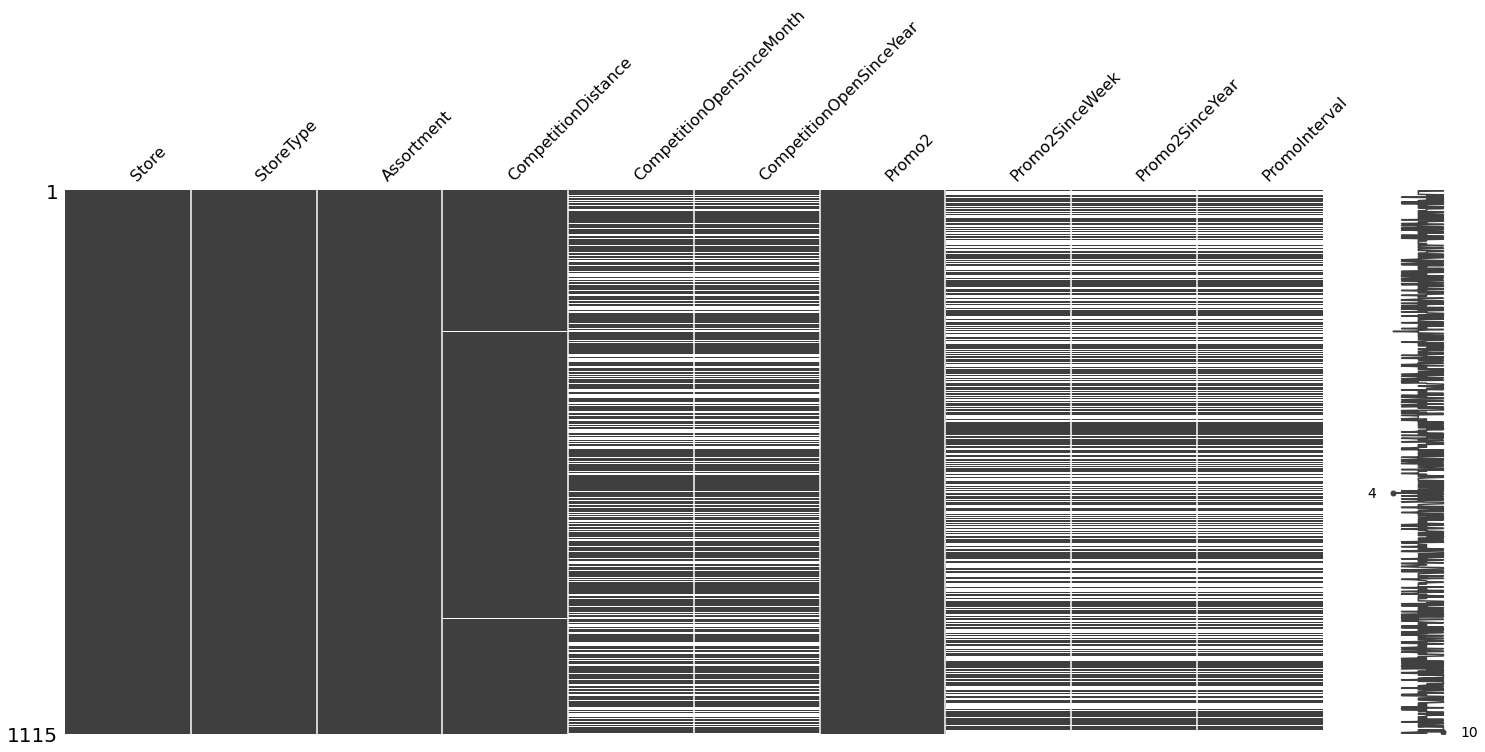

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(store)

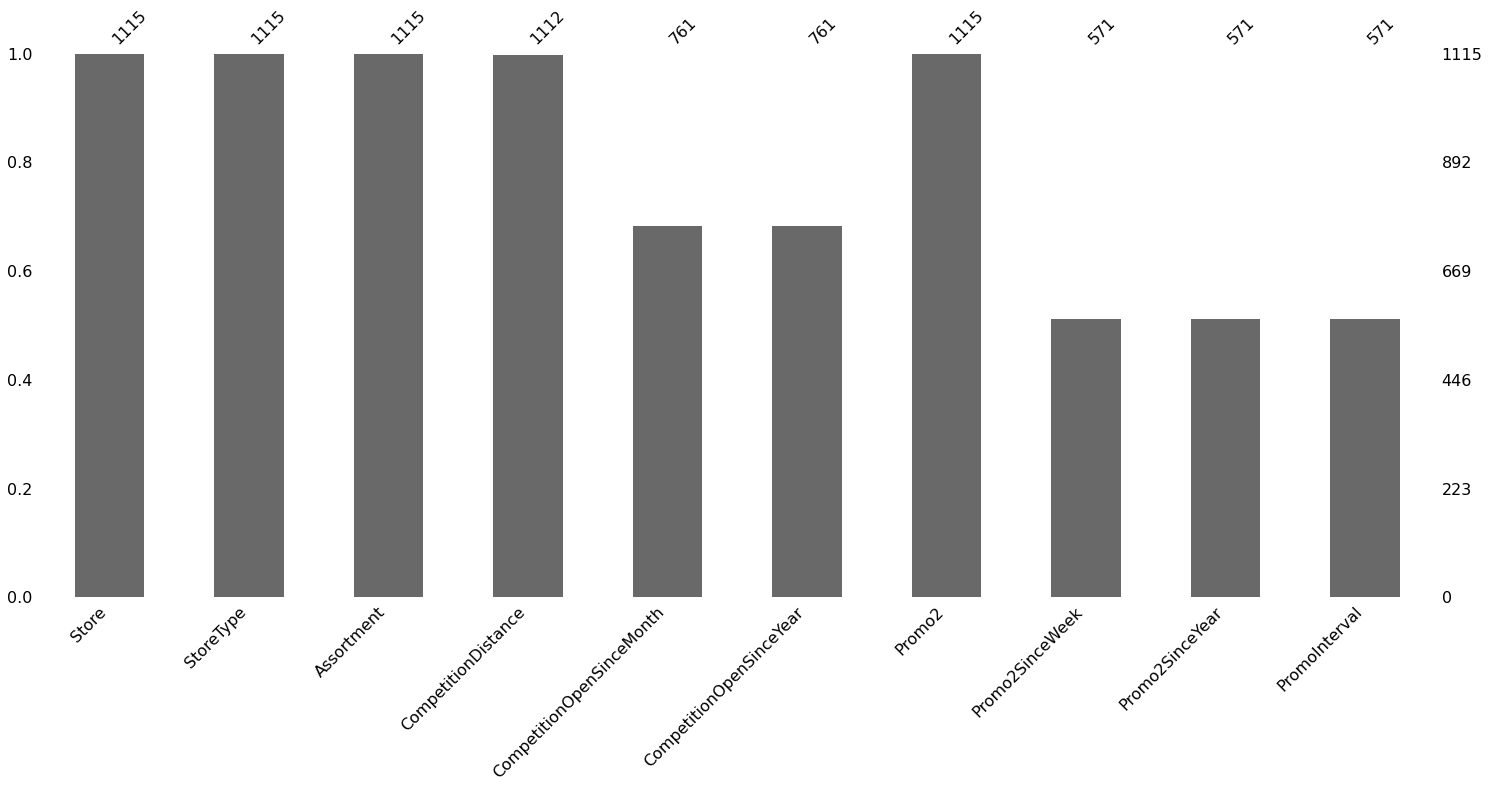

In [ ]:
msno.bar(store)

### What did you know about your dataset?

1. CompetitionDistance has 3 null values.
2. CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 null values.
3. Promo2SinceWeek ,Promo2SinceYear and PromoInterval have 544 null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day.
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open.
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 0->No holidays and a,b,c->Different types holidays.
7. SchoolHoliday - Indicates whether school was open or closed(0-Open,1-Closed).
8. StoreType - differentiates between 4 different store models: a, b, c, d
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
10. CompetitionDistance - distance in meters to the nearest competitor store
11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
12. Promo - indicates whether a store is running a promo on that day
13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in list(store.columns):
  print(col)
  print('Unique Values:')
  print(store[col].unique())
  print('length:',len(store[col].unique()))
  print("-"*50)

Store
Unique Values:
[   1    2    3 ... 1113 1114 1115]
length: 1115
--------------------------------------------------
StoreType
Unique Values:
['c' 'a' 'd' 'b']
length: 4
--------------------------------------------------
Assortment
Unique Values:
['a' 'c' 'b']
length: 3
--------------------------------------------------
CompetitionDistance
Unique Values:
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02


## 3. ***Data Wrangling***

### Data Wrangling Code

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


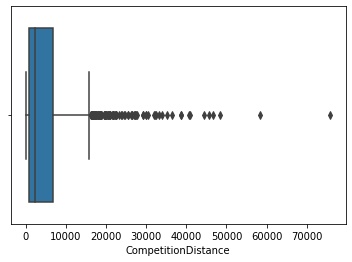

In [ ]:
# Write your code to make your dataset analysis ready.
sns.boxplot(store['CompetitionDistance'])

In [ ]:
store_df=store.copy()
store_df['CompetitionDistance']=store_df['CompetitionDistance'].fillna(0) #Filling the 3 null values with 0
store_df['CompetitionDistance'].isnull().sum()
#CompetitionDistance contains many outlier which needs to be fixed

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0

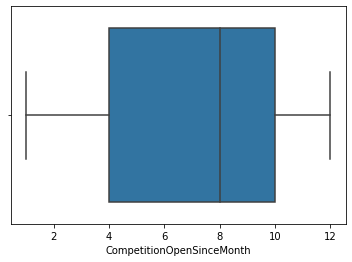

In [ ]:
sns.boxplot(store_df['CompetitionOpenSinceMonth'])
#No outlier is present in CompetitionOpenSinceMonth,So only the null values has to be taken care
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceMonth'].isnull().sum()

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


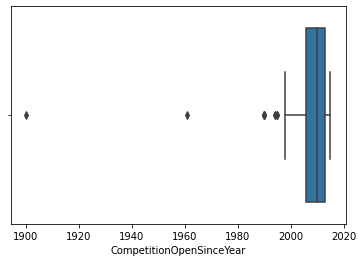

In [ ]:
sns.boxplot(store_df['CompetitionOpenSinceYear'])

In [ ]:
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['CompetitionOpenSinceYear'].isnull().sum()

0

In [ ]:
store_df['Promo2SinceWeek']=store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear']=store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval']=store_df['PromoInterval'].fillna(0)

In [ ]:
import datetime as dt
df1=df.copy()
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month

In [ ]:
store_df.isnull().sum()
#The data has been cleaned

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
#Merging of rossman stores data and store
dff = pd.merge(df1, store_df, how='left', on='Store')

In [ ]:
dff.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
dff.shape

(1017209, 20)

### What all manipulations have you done and insights you found?

1. CompetitionDistance has 3 null value which was replaced by 0 and it was found out that it has many outliers.
2. CompetitionOpenSinceMonth has no outliers.
3. CompetitionOpenSinceYear has 4 outliers. 1900, 1960 and 2 outliers between 1980 and 2000.
4. Promo2SinceWeek, Promo2SinceYear and PromoInterval had null values that was replaced by 0.
5. Rossman Store data and Store data have been merged. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Stores operating each day of the week

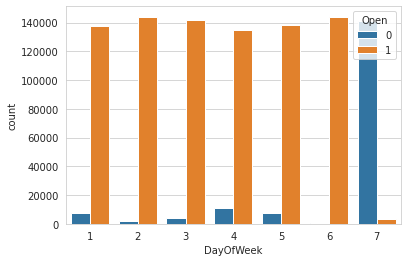

In [ ]:
# Chart - 1 visualization code
sns.set_style("whitegrid")
sns.countplot(x='DayOfWeek',hue='Open',data=dff)

##### 1. Why did you pick the specific chart?

To check the number of stores opened on each specific day of the week.

##### 2. What is/are the insight(s) found from the chart?

As we can see from the graph that most of the stores are open 6 days but on the 7th day i.e Sunday most of the stores are closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,it will provide us the number of stores operating everyday.
Suppose a company wants to find out on which day the maximum number of stores are opened and how much they are contributing to the overall sales this graph will be helpful and it also shows how much it is getting affected due to closed stores.

#### Chart - 2 - Sales of each year and its respective month

In [ ]:
# Chart - 2 visualization code
x=dff.groupby(['year','month'],as_index=False).agg({'Sales':"sum"})
x.year.unique()

array([2013, 2014, 2015])

In [ ]:
#2013
df_2013=df1[df1['year']==2013]
temp1=df_2013.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2014
df_2014=df1[df1['year']==2014]
temp2=df_2014.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2015
df_2015=df1[df1['year']==2015]
temp3=df_2015.groupby(['month'],as_index=False).agg({'Sales':'sum'})

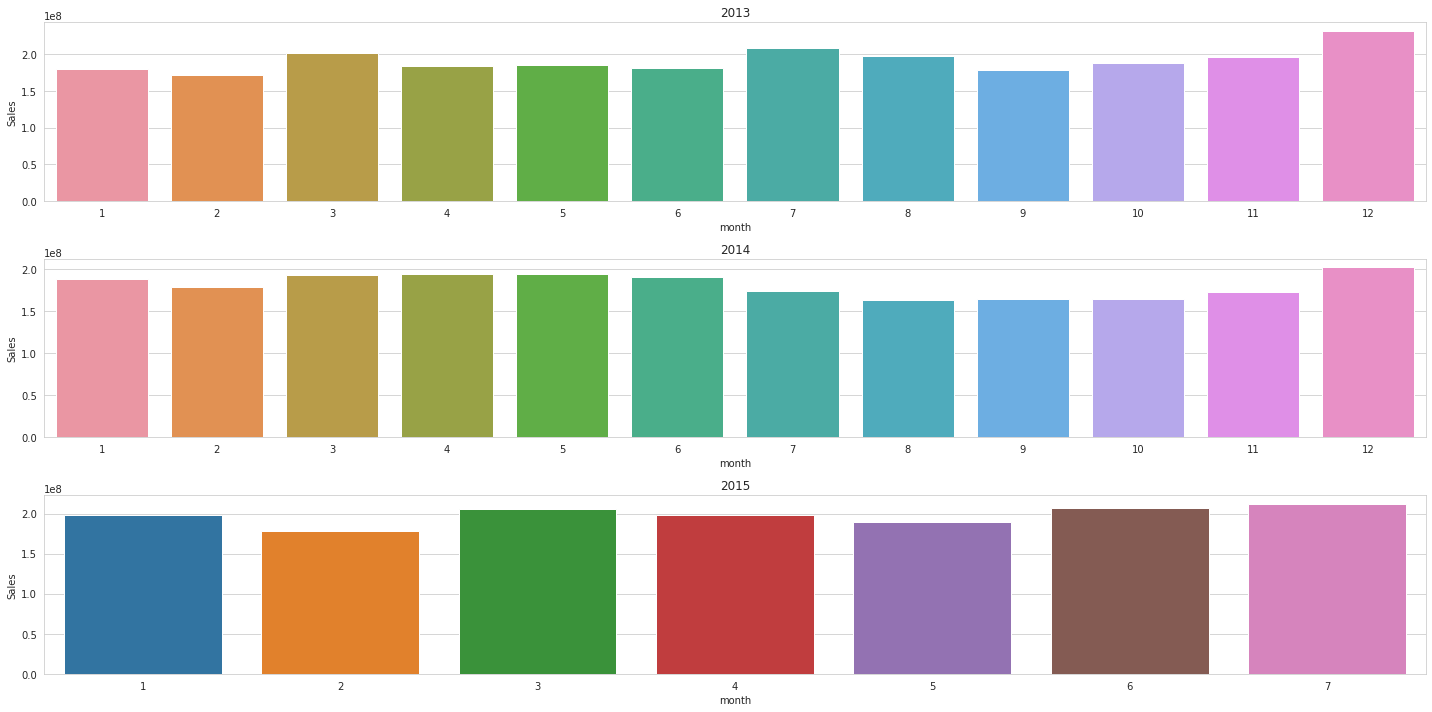

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes[0].set_title('2013')
sns.barplot(ax=axes[0], data=temp1, x='month', y='Sales')
axes[1].set_title('2014')
sns.barplot(ax=axes[1], data=temp2,x='month', y='Sales')
axes[2].set_title('2015')
sns.barplot(ax=axes[2], data=temp3, x='month', y='Sales')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To know the sales of the store for specific year and its respective month.

##### 2. What is/are the insight(s) found from the chart?

1. For year 2013 sales was highest in december and least in february.
2. For year 2014 sales was highest in december and least in august.
3. For year 2015 sales was highest in july and there were no sales for the month august,september,october,november and december.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help in knowing which year and its month gained most sales and least sales.If a company wants to find out the months which are consistent in getting sales in all the 3 years this graph will provide insights.

#### Chart - 3 - Month vs Sales

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


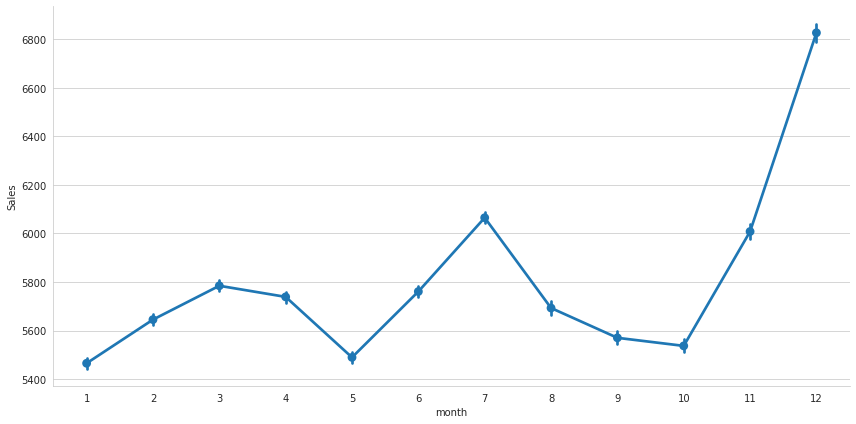

In [ ]:
# Chart - 3 visualization code
sns.factorplot(x="month" ,y = "Sales" , data=df1, kind="point", aspect=2,size=6)

##### 1. Why did you pick the specific chart?

Sales of every month is depicted here.

##### 2. What is/are the insight(s) found from the chart?

Sales in winter i.e November and December is climbs up.It might be due to the vacation period.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales in the month January, May, October decreases significantly.

#### Chart - 4 - Yearly Sales 

   year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


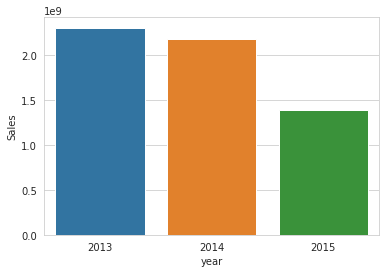

In [ ]:
# Chart - 4 visualization code
#Yearwise
result=df1.groupby(['year'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'year', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

To know overall which year had the most sales.

##### 2. What is/are the insight(s) found from the chart?

2013 has the highest sales followed by 2014 and then 2015.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,It'll help to find out the different conditions which helped in the Sales for 2013.

#### Chart - 5 - Montly Sales

    month      Sales
0       1  566728724
1       2  528734410
2       3  599831906
3       4  575895295
4       5  569248217
5       6  578112775
6       7  595059205
7       8  361791202
8       9  342570131
9      10  351878728
10     11  369498877
11     12  433831153


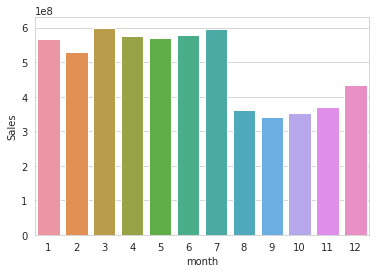

In [ ]:
# Chart - 5 visualization code
#MonthWise
result = df1.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'month', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

To know sum of sales of each particular month.

##### 2. What is/are the insight(s) found from the chart?

Sum of sales of March is highest followed by July.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide the month where sum of sales is more and the factors which are affecting the sales like holidays.

#### Chart - 6 - School holiday

In [ ]:
dff.SchoolHoliday.value_counts()
#As we can see 0 has more counts.So, it'll mean 0 implies school is open and 1 implies school is closed.

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

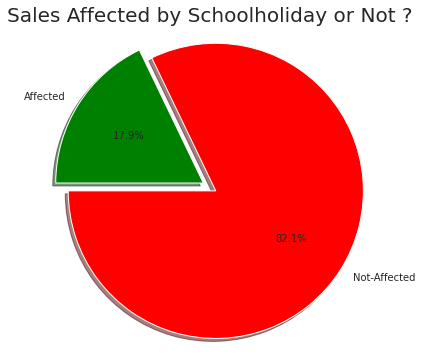

In [ ]:
# Chart - 6 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = dff.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To know whether the sales is affected by SchoolHoliday or not.

##### 2. What is/are the insight(s) found from the chart?

Around 18% of the Sales if affected by SchoolHoldiay rest 82% remain unaffected.So Majorly SchoolHoliday is not affected the Sales much.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Deciding whether opening a store on School holiday will be beneficial or not.Suppose a company wants to launch some products which is targeted towards students,this graph will depict whether having school holiday will impact the sales of those products or not.

#### Chart - 7 State holiday 

In [ ]:
# Chart - 7 visualization code
dff.StateHoliday.value_counts()
#0->No holidays and a,b,c->Different types holidays

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
dff["StateHoliday"] = dff["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
dff.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

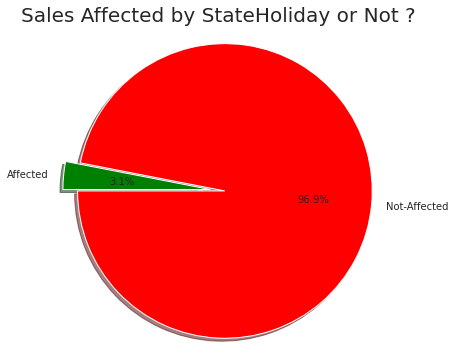

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = dff.StateHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by StateHoliday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
dff.drop('StateHoliday',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To know the affect of State holiday on the Sales.

##### 2. What is/are the insight(s) found from the chart?

i. Only 3% Sales is affected by State Holiday.

ii. Remaining 97% Sales are unaffected.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Suppose some company is launching its new collections of products and wants to find out whether launching it during state holidays will be beneficial or not.This graph will provide an idea regarding the affect of state holiday on sales. 

#### Chart - 8- Promo

In [ ]:
dff.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

Text(0.5, 0, 'Promo')

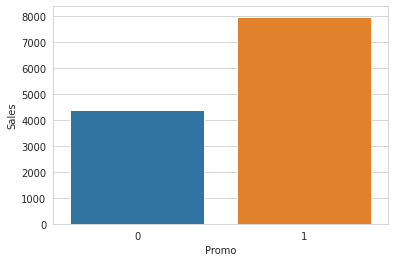

In [ ]:
# Chart - 8 visualization code
promo=dff.groupby(['Promo'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo.index, y = promo['Sales'])
plt.xlabel('Promo')
#0->No Promotion, 1-Promotion

In [ ]:
dff.Promo2.value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

Text(0.5, 0, 'Promo2')

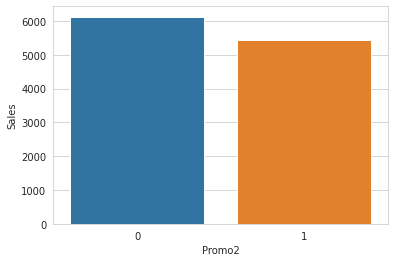

In [ ]:
promo2=dff.groupby(['Promo2'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo2.index, y = promo2['Sales'])
plt.xlabel('Promo2')
#0->No Promotion, 1-Promotion

##### 1. Why did you pick the specific chart?

To know the affect of Promotion on Sales.

##### 2. What is/are the insight(s) found from the chart?

1. In the 1st graph promotion(Promo) showed growth in sales.
2. In the 2nd graph promotion(Promo2) showed no growth.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This will be helpful while deciding whether promotion will impact the sales and if so how much promotion will be beneficial.

#### Chart - 9- Types of Stores

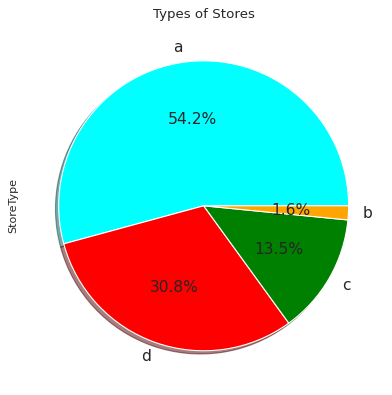

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,7), dpi=80)

dff['StoreType'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['cyan','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Stores")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

To know the different types of stores and their respective Sales.

##### 2. What is/are the insight(s) found from the chart?

Store type a has the most sales followed by d then c and at last b.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll identify the store type and in what percentage they are present.This will be helpful in knowing which type of store is generating more sales and later its percentage can be increased.Similarly this will show which type of store is generating less sales and if that type is present in high percentage then it can be changed with other type of store that is generating better revenue.

#### Chart - 10- Different Sales chart

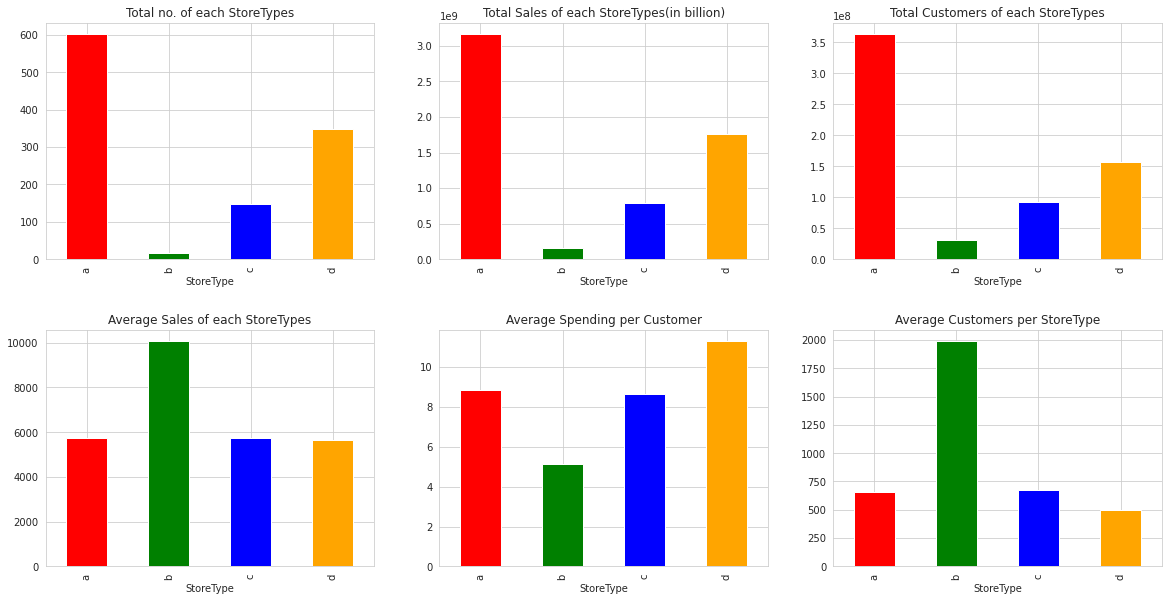

In [ ]:
# Chart - 9 visualization code

dff["Avg_Customer_Sales"] = df.Sales/df.Customers
f, ax = plt.subplots(2, 3, figsize = (20,10))

color=[ 'red', 'green', 'blue', 'orange']

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total no. of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of each StoreTypes(in billion)",color=color)
dff.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total Customers of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of each StoreTypes",color=color)
dff.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color=color)
dff.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color=color)

plt.subplots_adjust(hspace = 0.3)
plt.show()


In [ ]:
dff.drop('Avg_Customer_Sales',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

The know the customer spending analysis in each store type.

##### 2. What is/are the insight(s) found from the chart?

1. 1st graph represents the total no. of each type of store.
2. 2nd graph represents the total sales in each type of store.
3. 3rd grapg represents the total customers visiting each type of store.
4. 4th graph represents averaga sales of each type of store.
5. 5th graph represents the average spending by each customer in each type of store.
6. 6th graph represents the average customer visiting each type of store.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it'll help to find out which store type is preferred by customer the most.

#### Chart - 11 - Assortment

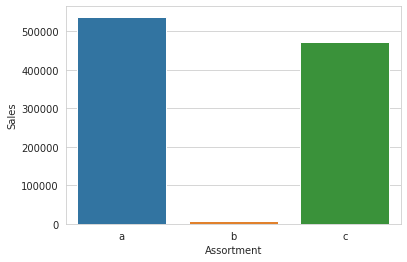

In [ ]:
t=dff.groupby('Assortment',as_index=False).agg({'Sales':'count'})
#sns.countplot(x='Sales',hue="Assortment",data=t)
sns.barplot(x='Assortment',y='Sales',data=t)

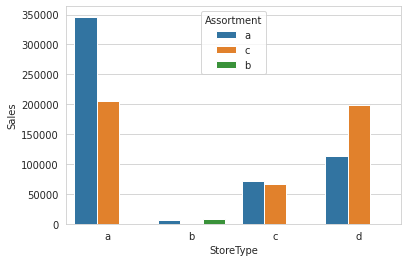

In [ ]:
# Chart - 10 visualization code
temp=dff.groupby(['StoreType','Assortment'],as_index=False).agg({'Sales':'count'})
sns.barplot(x='StoreType',y='Sales',hue='Assortment',data=temp)

##### 1. Why did you pick the specific chart?

To know which type of Assortment is sold more.

##### 2. What is/are the insight(s) found from the chart?

1. Store type a has a and c type assortment.
2. Store type b has a and b type assortment.
3. Store type c has a and c type assortment.
4. Store type d has a and c type assortment.
5. Assortment type a is sold more which means their demand is high followed by type c.
6. b has the least sales which might mean they are high quality product and also they are available only in store type b. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide details about which type of assortment is highly sold in which type of store.If any particular type of Assortment is not generating enough revenue then it can be changed with some other Assorment.

#### Chart - 12 - Customer vs Sales

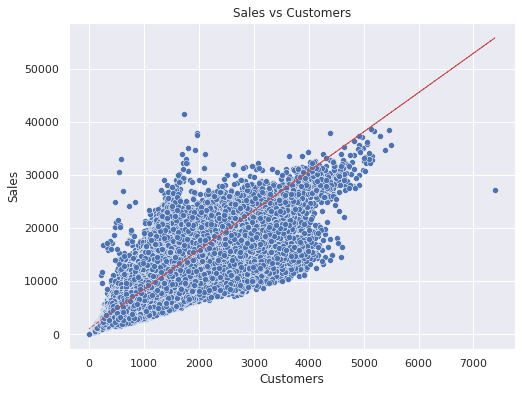

In [ ]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize": (8, 6)})
ax= sns.scatterplot(data=dff, x="Customers", y="Sales", palette ='bright').set_title("Sales vs Customers")
z = np.polyfit(dff['Customers'], dff['Sales'], 1)
y = np.poly1d(z)(dff['Customers'])
plt.plot(dff['Customers'], y, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

This graph depicts each customer and its respective sales.The red line represents mean sales and customer.

##### 2. What is/are the insight(s) found from the chart?

1. The majority of customers lie beneth the red line.
2. Customers between the range [0-5000] are responsible for Sales between the range [0-35000]. 
3. Some outliers can also be seen.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide the details regarding the customers and the amount of Sales they are responsible for.This will show the details of how many customers are responsible for how much sales.In the graph it can be clearly seen that more customers are present under the red line.

#### Chart - 13 - Promotion

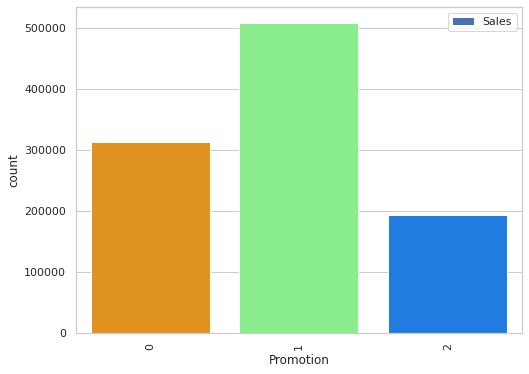

In [ ]:
# Chart - 13 visualization code
sns.set_style("whitegrid")
dff['Promotion']=dff['Promo']+dff['Promo2']
dff.groupby(['Promotion']).agg({'Sales':'count'}).plot.bar()
sns.countplot(x="Promotion", data=dff,palette='jet_r')

In [ ]:
dff.drop(['Promo','Promo2'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To know the affect of promotion on Sales.

##### 2. What is/are the insight(s) found from the chart?

Store which are promoted once have the highest sales followed by the stores with 0 promotion and stores which are promoted twice doesn't have a huge impact on sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the graph the store promoted more than once have the least sales compared to others.

#### Chart - 14 - Correlation Heatmap

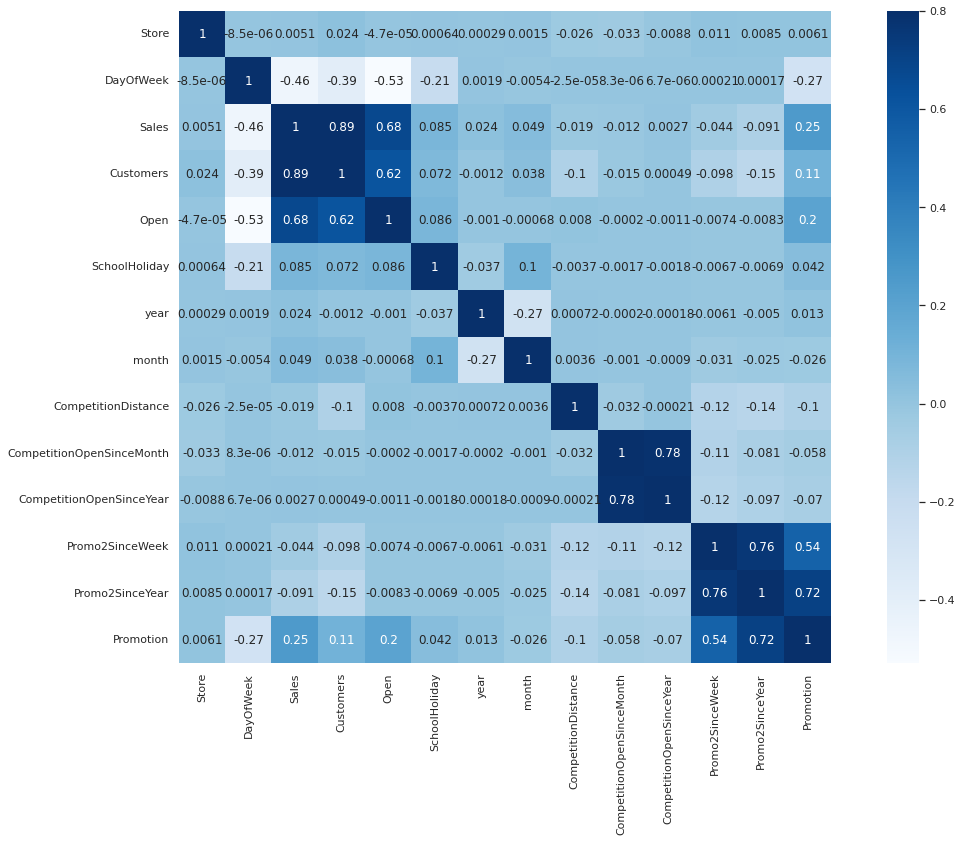

In [ ]:
# Correlation Heatmap visualization code
#correlation matrix
corrmat = dff.corr()
h, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues",annot=True);

##### 1. Why did you pick the specific chart?

To know how each feature is related to every other feature.

##### 2. What is/are the insight(s) found from the chart?

Considering sales as our main priority, the following are the insights:
1. Store and Sales are almost negligible correlated.
2. DayofWeek and Sales  are negatively(-0.45) correlated.
3. Customer and Sales are positively(0.89) correlated.
4. Open and Sales are positively(0.68) correlated.
5. Promotion and Sales are positively(0.25) correlated.
6. All the other features are negligibly correlated with Sales.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
new_df=dff[['DayOfWeek','Sales','Customers','StoreType']].copy()

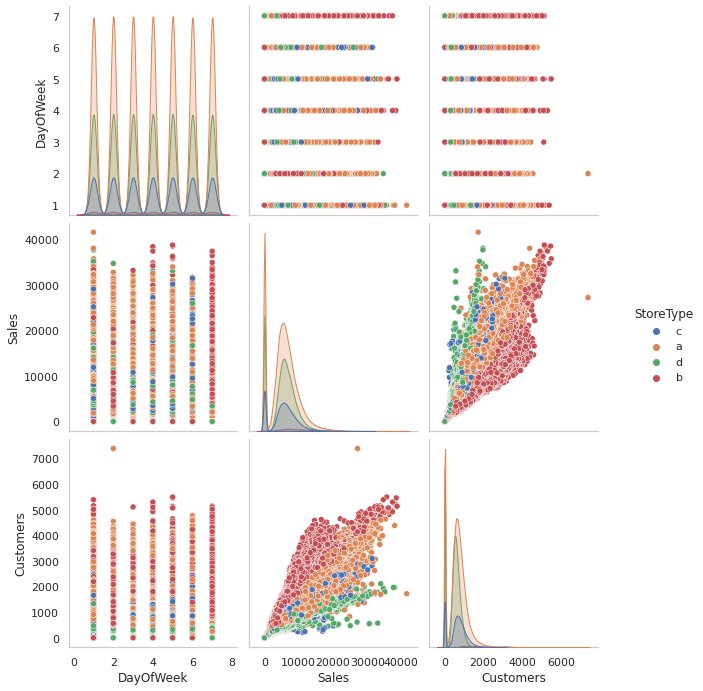

In [ ]:
pp=sns.pairplot(new_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

To plot multiple pairwise bivariate distributions of a dataset.

##### 2. What is/are the insight(s) found from the chart?

1. On 7th day of the week StoreType b had the most customer and sales.
2. Overall sales of StoreType b is the highest.
3. StoreType c and d are less in number compared to StoreType a and b.

In [ ]:
#Mapping
dff["Assortment"] = dff["Assortment"].map({"a": 0, "b": 1, "c": 2})
dff["StoreType"] = dff["StoreType"].map({"a": 0, "b": 1, "c": 2,"d":3})

####**EDA CONSLUSION:**

1. Most of the stores remains closed during 7th day of the week i.e Sunday.
2. Sales increases drastically during the month of November and December.
3. Of all the 3 years the overall sales of March month is the highest.
4. School holiday affects only around 18% of the sales.
5. Only 3% of the Sales is affected by State holiday.
6. Promotion helps in increasing the sales.
7. Presence of StoreType a is the highest and StoreType b is the least.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Chechking whether mean sales = median sales or not.

Ho: mean sales = median Sales

Ha: mean Sales != median Sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
#perform one sample t-test
ttest,pval=stats.ttest_1samp(a=dff['Sales'], popmean=dff['Sales'].median())
print(ttest,pval)
if pval>0.05:
  print('Ho is accepted')
elif pval<0.05:
  print('Ho is rejected')

7.81169659397152 5.647659586929049e-15
Ho is rejected


In [ ]:
print('Lower limit:',stats.t.ppf(q=0.025,df=49))
print('Upper limit:',stats.t.ppf(q=0.975,df=49))

Lower limit: -2.0095752344892093
Upper limit: 2.009575234489209


pvalue < alpha(0.05), Hence Ho is rejected.Therefore Ha (mean Sales != median Sales) is accepted. 

##### Which statistical test have you done to obtain P-Value?

One Sample t-test

##### Why did you choose the specific statistical test?

A one sample t-test is used to test whether or not the mean of a population is equal to some value.Here we checked whether mean of Sales is equal to median Sales or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Checking if population mean of sales for year 2013 and 2014 are equal or not.

Ho:Populations means are equal

Ha:Population means are not equal.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats import weightstats as stests
temp_y1=dff[dff['year']==2013]
temp_y2=dff[dff['year']==2014]
ztest ,pval = stests.ztest(temp_y1['Sales'], x2=temp_y2['Sales'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("Ho is rejected")
else:
    print("Ho is accepted")

3.0149113407654322e-89
Ho is rejected


##### Which statistical test have you done to obtain P-Value?

Two-sample Z test

##### Why did you choose the specific statistical test?

Sample size is greater than 30.So, z test would serve as a better option.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Checking whether StoreType and Assortment are related.

Ho:There is no relation between StoreType and Assortment.

Ha:There is relation between StoreType and Assortment.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
contingency_table=pd.crosstab(dff["StoreType"],dff["Assortment"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Assortment       0     1       2
StoreType                       
0           346389     0  205238
1             6594  8294     942
2            70878     0   65962
3           113584     0  199328
Observed Values :-
 [[346389      0 205238]
 [  6594   8294    942]
 [ 70878      0  65962]
 [113584      0 199328]]
Expected Values :-
 [[2.91453549e+05 4.49779184e+03 2.55675659e+05]
 [8.36382135e+03 1.29072806e+02 7.33710585e+03]
 [7.22997671e+04 1.11575002e+03 6.34244829e+04]
 [1.65327863e+05 2.55138534e+03 1.45032752e+05]]
Degree of Freedom:- 1
chi-square statistic:- 551616.1767054694
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 551616.1767054694
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test

##### Why did you choose the specific statistical test?

It is used to determine whether there is a significant association between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(dff[dff.CompetitionOpenSinceMonth==0].shape[0]*100/dff['CompetitionOpenSinceMonth'].shape[0],'%')
print(dff[dff.CompetitionOpenSinceYear==0].shape[0]*100/dff['CompetitionOpenSinceYear'].shape[0],'%')
#CompetitionOpenSinceMonth and CompetitionOpenSinceYear has around 32% null values
#These will be dropped during the feature selection

31.787764363075826 %
31.787764363075826 %


#### What all missing value imputation techniques have you used and why did you use those techniques?

Found the percentage of missing values present and later dropped the column in feature selection.

### 2. Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f39b2198520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f39b2198be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f39b2198040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f39b21a62e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f39b21a65e0>],
 'means': []}

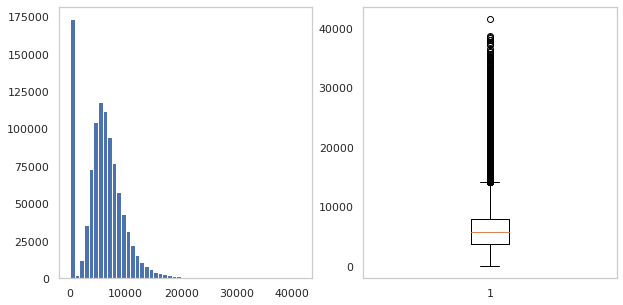

In [ ]:
# Handling Outliers & Outlier treatments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(dff['Sales'], bins=50)
ax2.boxplot(dff['Sales'])

In [ ]:
mod_df = dff.drop(dff[(dff.Open == 0) & (dff.Sales == 0)].index)

In [ ]:
print(dff.shape[0])
mod_df.shape[0]

1017209


844392

In [ ]:
mod_df.drop('Open',axis=1,inplace=True)

In [ ]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   SchoolHoliday              844392 non-null  int64  
 6   year                       844392 non-null  int64  
 7   month                      844392 non-null  int64  
 8   StoreType                  844392 non-null  int64  
 9   Assortment                 844392 non-null  int64  
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2SinceWeek            8

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


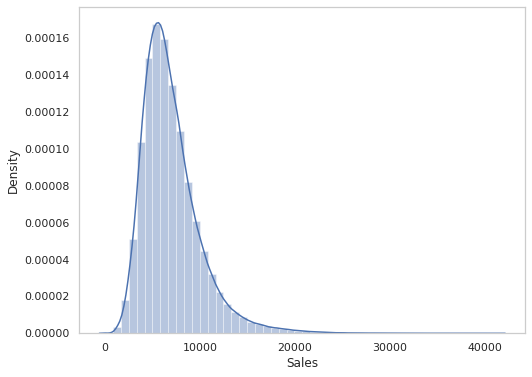

In [ ]:
sns.distplot(mod_df['Sales'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

We dropped the rows where Open=0 and sales=0.So,that we will get only those rows that have some sales.
The distribution graph was almost like normal distribution so no further transformation was performed.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
mod_df = pd.get_dummies(mod_df, columns=['PromoInterval'])
#Mapping(This code has been used above so adding this as a comment here)
#mod_df["Assortment"] = dff["Assortment"].map({"a": 0, "b": 1, "c": 2})
#mod_df["StoreType"] = dff["StoreType"].map({"a": 0, "b": 1, "c": 2,"d":3})
mod_df.head()


,Store,DayOfWeek,Date,Sales,Customers,SchoolHoliday,year,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Promotion,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,2015,7,2,0,1270.0,9.0,2008.0,0.0,0.0,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,2015,7,0,0,570.0,11.0,2007.0,13.0,2010.0,2,0,0,1,0
2,3,5,2015-07-31,8314,821,1,2015,7,0,0,14130.0,12.0,2006.0,14.0,2011.0,2,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,2015,7,2,2,620.0,9.0,2009.0,0.0,0.0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,2015,7,0,0,29910.0,4.0,2015.0,0.0,0.0,1,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Got dummies for PromoInterval and for Assortment and StoreType we used mapping.
Since PromoInterval has a group of months it was better to get dummies for it and Assortment and StoreType had categorical values so it had to be converted into numerical to perform analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(mod_df[[i for i in mod_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.005192e+00
1,DayOfWeek,1.114832e+00
2,Customers,1.172438e+00
3,SchoolHoliday,1.034204e+00
4,year,1.079046e+00
5,month,1.096676e+00
6,StoreType,1.111493e+00
7,Assortment,1.110665e+00
8,CompetitionDistance,1.092491e+00
9,CompetitionOpenSinceMonth,2.652490e+00


In [ ]:
calc_vif(mod_df[[i for i in mod_df.describe().columns if i not in ['Sales','Promo2SinceYear','year','PromoInterval_0','CompetitionOpenSinceYear']]])

,variables,VIF
0,Store,3.539183
1,DayOfWeek,4.171344
2,Customers,4.185291
3,SchoolHoliday,1.264200
4,month,3.714865
5,StoreType,1.883419
6,Assortment,2.056215
7,CompetitionDistance,1.524037
8,CompetitionOpenSinceMonth,2.157586
9,Promo2SinceWeek,3.762245


##### What all feature selection methods have you used  and why?

Variance Inflation Factor(VIF)is used because it helps in removing features which are highly correlated.

##### Which all features you found important and why?

1. Store will specify the respective Sales.
2. DayOfWeek will provide the affect of each day on Sales.
3. Customers column for its influence on Sales.
4. month will provide sales and the customer frequency with each respective month.
5. StoreType and Assortment - To provide details about store and its inventory.
6. Promotion- To know the affect of promotion on Sales.
7. PromoInterval- Promotion given on which month.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
import math
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

#### LINEAR REGRESSION

In [ ]:
# ML Model - 1 Implementation
X=mod_df.drop(['Sales','Promo2SinceYear','year','Date','PromoInterval_0','CompetitionOpenSinceYear'],axis=1)
y=mod_df['Sales']
# Fit the Algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
# Predict on the model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

(675513, 14)
(168879, 14)


0.7628248844632084

In [ ]:
mod_df.shape

(844392, 20)

In [ ]:
X.columns

Index(['Store', 'DayOfWeek', 'Customers', 'SchoolHoliday', 'month',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promotion',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
reg.intercept_

803.6430388005383

In [ ]:
reg.coef_

array([-1.57394409e-01, -6.86551289e+01,  6.34818109e+00,  3.27000610e+01,
        2.99264459e+01,  2.75197966e+02,  2.18373197e+02,  2.90387583e-02,
        1.29898880e+01,  1.22925376e+01,  1.29786937e+03, -1.36232649e+03,
       -1.24002605e+03, -1.60703132e+03])

In [ ]:
y_pred=reg.predict(X_test)
y_pred

array([5313.9230969 , 4754.39941903, 7170.60183565, ..., 4012.68639751,
       7813.99491568, 5424.52429978])

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([5416.13270345, 6712.16146354, 6733.99648513, ..., 7842.51788919,
       6932.07284205, 6048.84501834])

In [ ]:
y_test

123995     5495
969320     5472
24758      7969
785700     7384
427162    13212
          ...  
928329    16337
981707     9195
144715     2938
573284    10413
328700     5828
Name: Sales, Length: 168879, dtype: int64

In [ ]:
y_train

340381    5409
921364    7339
545501    7807
994682    7964
857291    2896
          ... 
431396    9037
183529    6196
143644    4817
525999    6194
367759    5862
Name: Sales, Length: 675513, dtype: int64

In [ ]:
print('Mean Squared Error=',mse(y_test, y_pred))
print('Root Mean Squared Error=',math.sqrt(mse(y_test, y_pred)))

Mean Squared Error= 2272732.9043688267
Root Mean Squared Error= 1507.5585906918598


In [ ]:
r2_score(y_test,y_pred)

0.7627262123598313

In [ ]:
#predictions 
y_pred = reg.predict(X_test)
d={'Actual Sale':y_test,'Predicted Sales':y_pred}
x=pd.DataFrame(d)
x.head()

,Actual Sale,Predicted Sales
123995,5495,5313.923097
969320,5472,4754.399419
24758,7969,7170.601836
785700,7384,6127.356066
427162,13212,7822.323135


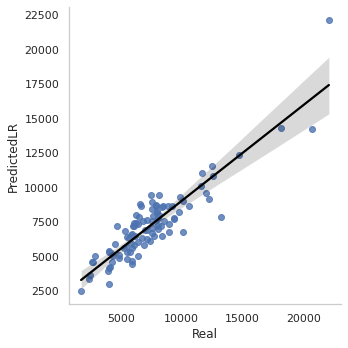

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#### LASSO AND RIDGE

In [ ]:
#LASSO
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
print('Lasso Training score =',lasso_cv.score(X_train, y_train))
print('Lasso Testing score =',lasso_cv.score(X_test, y_test))

Lasso Training score = 0.7628248844630207
Lasso Testing score = 0.7627262133527091


In [ ]:
#RIDGE
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1,0.5, 1, 10]).fit(X_train, y_train)

#score
print("Ridge training score = {}".format(ridge_cv.score(X_train, y_train)))
print("Ridge testing score = {}".format(ridge_cv.score(X_test, y_test)))

Ridge training score = 0.7628245635233102
Ridge testing score = 0.7627255267243246


#### DECISION TREE

In [ ]:
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(dt.score(X_train,y_train),'\n',dt.score(X_test,y_test))

0.785169678510834 
 0.7858823472082516


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mae=mean_absolute_error(y_test,y_pred_dt)
mape=mean_absolute_percentage_error(y_test,y_pred_dt)
msqe=mse(y_test,y_pred_dt)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test,y_pred_dt)
dt_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt_metric)

                     0
MAE       1.036893e+03
MAPE      5.384346e+14
MSE       2.050931e+06
RMSE      1.432107e+03
R2 SCORE  7.858823e-01


In [ ]:
#predictions 
y_pred_dt = dt.predict(X_test)
d={'Actual Sales':y_test,'Predicted Sales':y_pred_dt}
x=pd.DataFrame(d)
print("Decision Tree")
x.head()

Decision Tree


,Actual Sales,Predicted Sales
123995,5495,5276.267975
969320,5472,5276.267975
24758,7969,6771.722956
785700,7384,6771.722956
427162,13212,10389.571615


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Linear Regression and Decision Tree model have been used.
# Visualizing evaluation Metric Score chart
print(dt_metric)

                     0
MAE       1.036893e+03
MAPE      5.384346e+14
MSE       2.050931e+06
RMSE      1.432107e+03
R2 SCORE  7.858823e-01


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#another script that takes toooo long, to find the right parameters for tree
#tree = DecisionTreeRegressor()

#params = {'min_samples_split':[2,3,5,7],'min_samples_leaf':[6,8,10],}

#grid = RandomizedSearchCV(estimator=tree,param_distributions=params,verbose=True,cv=10)
# choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

#grid.fit(X_train, y_train)
#print(grid.best_params_)
#Best parameter {'min_samples_split': 3, 'min_samples_leaf': 6}


In [ ]:
# Fit the Algorithm
tree = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=6)
tree.fit(X_train,y_train)
print('Model Training score =',tree.score(X_train,y_train),'\n Model Test score',tree.score(X_test,y_test))
# Predict on the model
y_pred_dth=tree.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_dth)
mape=mean_absolute_percentage_error(y_test,y_pred_dth)
msqe=mse(y_test,y_pred_dth)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test,y_pred_dth)
dt_update_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt_update_metric)

Model Training score = 0.9795776803227447 
 Model Test score 0.9608649579025559
                      0
MAE          401.908000
MAPE           0.058758
MSE       374855.978713
RMSE         612.254832
R2 SCORE       0.960865


In [ ]:
#predictions 
d={'Actual Sales':y_test,'Predicted Sales':y_pred_dt,'Predicted Sales with tuning':y_pred_dth}
x=pd.DataFrame(d)
print("Decision Tree with Hyper parameter tuning")
x.head()

Decision Tree with Hyper parameter tuning


,Actual Sales,Predicted Sales,Predicted Sales with tuning
123995,5495,5276.267975,5159.142857
969320,5472,5276.267975,5737.285714
24758,7969,6771.722956,7672.000000
785700,7384,6771.722956,7069.000000
427162,13212,10389.571615,12374.000000


##### Which hyperparameter optimization technique have you used and why?

RandomSearchCV was used for Hyperparameter Tuning.
RandomSearchCV is faster when it comes to large data since it chooses the parameter randomly and the more samples you test from the value set, the more confident the search will be.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print('Decision Tree')
print(dt_metric)
print('\nDecision Tree with Hyperparameter tuning')
print(dt_update_metric)

Decision Tree
                     0
MAE       1.036893e+03
MAPE      5.384346e+14
MSE       2.050931e+06
RMSE      1.432107e+03
R2 SCORE  7.858823e-01

Decision Tree with Hyperparameter tuning
                      0
MAE          401.908000
MAPE           0.058758
MSE       374855.978713
RMSE         612.254832
R2 SCORE       0.960865


In [ ]:
x['Actual-Predicted']=abs(x['Actual Sales']-x['Predicted Sales'])
x['Actual-Predicted(Tuned)']=abs(x['Actual Sales']-x['Predicted Sales with tuning'])
print('Percentage error of Decision Tree:',(x['Actual-Predicted'].sum()/x['Actual Sales'].sum())*100)
print(('Percentage error of Decision Tree(Tuned):'),(x['Actual-Predicted(Tuned)'].sum()/x['Actual Sales'].sum())*100)

Percentage error of Decision Tree: 14.919619521970107
Percentage error of Decision Tree(Tuned): 5.782963947381596


1. All the errors in the Tuned Decision Tree are way less than the original decision tree.
2. R2 score of Tuned Decision Tree is more.
3. Percentage error of Tuned Decision Tree is less than the normal Decision Tree.
So Tuned Decision Tree is performing better.

#### RANDOM FOREST

In [ ]:
#another script that takes toooo long, to find the right parameters for RFR
#rfr=RandomForestRegressor(n_jobs=-1)
#params = {'n_estimators':[40,50,60,70,80],'min_samples_split':[2,3,6],'min_samples_leaf':[1,2,3],'max_depth':[None,5,10]}

#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option than GridSearchCV
#grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=5)

#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
#grid.fit(X_train, y_train)
#grid.best_params_

Here are our best parameters for Random Forest

{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)
rdf_pred=rdf.predict(X_test)
print(rdfreg.score(X_train, y_train))
print(rdfreg.score(X_test, y_test))

0.9960444977387611
0.9729815830337705


In [ ]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted Sales(DT Tuned)':y_pred_dth,'Predicted Sales(RF)':rdf_pred})
print(temp_df)

        Actual  Predicted Sales(DT Tuned)  Predicted Sales(RF)
123995    5495                5159.142857           5230.13750
969320    5472                5737.285714           5695.47500
24758     7969                7672.000000           7585.71250
785700    7384                7069.000000           7497.97500
427162   13212               12374.000000          12590.48125
...        ...                        ...                  ...
928329   16337               15953.000000          15893.81250
981707    9195                9333.250000           9149.27500
144715    2938                2922.700000           2952.58750
573284   10413                9499.777778           9701.52500
328700    5828                6079.888889           5902.10000

[168879 rows x 3 columns]


In [ ]:
temp_df['Actual-Predicted Sales(RF)']=abs(temp_df['Actual']-temp_df['Predicted Sales(RF)'])
temp_df['Actual-Predicted Sales(DT Tuned)']=abs(temp_df['Actual']-temp_df['Predicted Sales(DT Tuned)'])
print("Percentage Error of Random Forest:",(temp_df['Actual-Predicted Sales(RF)'].sum()/temp_df['Actual'].sum())*100)
print("Percentage Error of Decision Tree(Tuned):",(temp_df['Actual-Predicted Sales(DT Tuned)'].sum()/temp_df['Actual'].sum())*100)

Percentage Error of Random Forest: 4.985203951735281
Percentage Error of Decision Tree(Tuned): 5.782963947381596


In [ ]:
# Predict on the model
rdf_pred=rdf.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_dth)
mape=mean_absolute_percentage_error(y_test,rdf_pred)
msqe=mse(y_test,rdf_pred)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test,rdf_pred)
rdf_pred_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(rdf_pred_metric)

                     0
MAE       4.019080e+02
MAPE      8.866981e+10
MSE       2.587966e+05
RMSE      5.087205e+02
R2 SCORE  9.729816e-01


Based on the decision metric ,R2 score and Percentage error, the Random forest performed better than Tuned Decision Tree.
So in this model Random Forest is giving the best result.

### ML Model -2- BASED ON THE ENTIRE DATASET

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
dff.drop(['Date','Store','year','month'],axis=1,inplace=True)
dff = pd.get_dummies(dff, columns=['PromoInterval'])

In [ ]:
# Visualizing evaluation Metric Score chart
X2=dff.drop('Sales',axis=1)
y2=dff['Sales']

In [ ]:
dff.shape

(1017209, 17)

####LINEAR REGRESSION

In [ ]:
# Fit the Algorithm
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 0)
print(X2_train.shape)
print(X2_test.shape)
# Predict on the model
reg2 = LinearRegression().fit(X2_train, y2_train)
print(reg2.score(X2_test, y2_test))

(813767, 16)
(203442, 16)
0.8675946617185324


According to the training score Model 2 is performing better than Model 1.

####DECISION TREE

In [ ]:
dt2=DecisionTreeRegressor(max_depth=5)
dt2.fit(X2_train,y2_train)
y2_pred_dt=dt2.predict(X2_test)
print('Model 2 Score:',dt2.score(X2_train,y2_train))
print('Model 1 Score:',dt.score(X_train,y_train))

Model 2 Score: 0.8692913879508066
Model 1 Score: 0.785169678510834


From the above score it can be seen that Model 2 is performing better.

In [ ]:
mae=mean_absolute_error(y2_test,y2_pred_dt)
mape=mean_absolute_percentage_error(y2_test,y2_pred_dt)
msqe=mse(y2_test,y2_pred_dt)
rmsqe=np.sqrt(msqe)
r2=r2_score(y2_test,y2_pred_dt)
dt2_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt2_metric)

                     0
MAE       9.139151e+02
MAPE      1.668110e+12
MSE       1.951828e+06
RMSE      1.397078e+03
R2 SCORE  8.679121e-01


#### 2. Cross- Validation & Hyperparameter Tuning

#####DECISION TREE

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#another script that takes toooo long, to find the right parameters for tree
#tree2 = DecisionTreeRegressor()

#params2 = {'min_samples_split':[2,3,5,7],'min_samples_leaf':[6,8,10],}

#grid = RandomizedSearchCV(estimator=tree2,param_distributions=params2,verbose=True,cv=10)
# choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
#grid.fit(X2_train, y2_train)
#print(grid.best_params_)
#{'min_samples_split': 3, 'min_samples_leaf': 6}

In [ ]:
# Fit the Algorithm
tree2 = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=6)
tree2.fit(X2_train,y2_train)
print('Model 2:',tree2.score(X2_train,y2_train),'\n Model 1:',tree.score(X_train,y_train))
# Predict on the model
y2_pred_dth=tree2.predict(X2_test)
mae=mean_absolute_error(y2_test,y2_pred_dth)
mape=mean_absolute_percentage_error(y2_test,y2_pred_dth)
msqe=mse(y2_test,y2_pred_dth)
rmsqe=np.sqrt(msqe)
r2=r2_score(y2_test,y2_pred_dth)
dt2_update_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])

Model 2: 0.988235351138864 
 Model 1: 0.9795776803227447


In [ ]:
print('Model 2:',dt2_update_metric)
print('\nModel 1:',dt_update_metric)

Model 2:                       0
MAE          334.751530
MAPE           0.048689
MSE       318599.119499
RMSE         564.445852
R2 SCORE       0.978439

Model 1:                       0
MAE          401.908000
MAPE           0.058758
MSE       374855.978713
RMSE         612.254832
R2 SCORE       0.960865


Based on the training score,decision metric and R2 score Model 2 is performing better in Decision Tree(Tuned).

In [ ]:
#predictions 
d2={'Actual Sales':y2_test,'Predicted Sales':y2_pred_dt,'Predicted Sales with tuning':y2_pred_dth}
x2=pd.DataFrame(d2)
print("Decision Tree with Hyper parameter tuning")
x2.head()

Decision Tree with Hyper parameter tuning


,Actual Sales,Predicted Sales,Predicted Sales with tuning
982497,7285,7651.377499,7247.333333
719065,6221,10731.775506,6483.142857
145542,8132,9096.411096,7704.111111
252177,20916,11835.110635,17929.454545
479489,5472,5476.684725,5404.571429


In [ ]:
x2['Actual-Predicted']=abs(x2['Actual Sales']-x2['Predicted Sales'])
x2['Actual-Predicted(Tuned)']=abs(x2['Actual Sales']-x2['Predicted Sales with tuning'])
print('Percentage error of Decision Tree:',(x2['Actual-Predicted'].sum()/x2['Actual Sales'].sum())*100)
print('Percentage error of Decision Tree(Tuned):',(x2['Actual-Predicted(Tuned)'].sum()/x2['Actual Sales'].sum())*100)

Percentage error of Decision Tree: 15.815445075081339
Percentage error of Decision Tree(Tuned): 5.792927796969905


#####RANDOM FOREST

In [ ]:
#another script that takes toooo long, to find the right parameters for RFR
#rfr2=RandomForestRegressor(n_jobs=-1)
#params = {'n_estimators':[40,50,60,70,80],'min_samples_split':[2,3,6],'min_samples_leaf':[1,2,3],'max_depth':[None,5,10]}

#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option than GridSearchCV
#grid = RandomizedSearchCV(estimator=rfr2,param_distributions=params2,verbose=True,cv=5)

#grid.fit(X2_train, y2_train)
#grid.best_params_

Here are our best parameters for Random Forest

{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
rdf2 = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg2 = rdf2.fit(X2_train, y2_train)
rdf2_pred=rdf2.predict(X2_test)
print(rdfreg2.score(X2_test, y2_test))

0.9828346396232689


In [ ]:
rdf2 = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdf2_pred=rdf2.predict(X2_test)

0.9971272827052818
0.9960444977387611


In [ ]:
y2_pred_rdf2=rdf2.predict(X2_test)
mae=mean_absolute_error(y2_test,y2_pred_rdf2)
mape=mean_absolute_percentage_error(y2_test,y2_pred_rdf2)
msqe=mse(y2_test,y2_pred_rdf2)
rmsqe=np.sqrt(msqe)
r2=r2_score(y2_test,y2_pred_rdf2)
rdf2_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(rdf2_metric)

                      0
MAE          309.286506
MAPE           0.045621
MSE       253648.005709
RMSE         503.634794
R2 SCORE       0.982835


In [ ]:
print(dt2_update_metric)

                      0
MAE          334.751530
MAPE           0.048689
MSE       318599.119499
RMSE         564.445852
R2 SCORE       0.978439


In [ ]:
#predictions 
d3={'Actual Sales':y2_test,'Predicted Sales(DT Tuned)':y2_pred_dth,'Predicted Sales(RF Tuned)':rdf2_pred}
x3=pd.DataFrame(d3)
print("Actual Sales vs Predicted(Decision Tree Tuned) vs Predicted(Random Forest Tuned)")
x3.tail()

Actual Sales vs Predicted(Decision Tree Tuned) vs Predicted(Random Forest Tuned)


,Actual Sales,Predicted Sales(DT Tuned),Predicted Sales(RF Tuned)
181840,5650,5852.333333,5971.072500
349515,5464,5120.000000,4781.160208
710927,6191,7730.166667,6828.987500
971200,5663,5614.285714,5425.525000
14246,2698,2354.111111,2348.433333


##### Which hyperparameter optimization technique have you used and why?

RandomSearchCV was used for Hyperparameter Tuning.
RandomSearchCV is faster when it comes to large data since it chooses the parameter randomly and the more samples you test from the value set, the more confident the search will be.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
print('Decision Tree(Tuned)\n',dt2_update_metric,'\n\nRandom Forest(Tuned)\n',rdf2_metric)

Decision Tree(Tuned)
                       0
MAE          334.751530
MAPE           0.048689
MSE       318599.119499
RMSE         564.445852
R2 SCORE       0.978439 

Random Forest(Tuned)
                       0
MAE          309.286506
MAPE           0.045621
MSE       253648.005709
RMSE         503.634794
R2 SCORE       0.982835


In [ ]:
x3['Actual-Predicted(DT Tuned)']=abs(x3['Actual Sales']-x3['Predicted Sales(DT Tuned)'])
x3['Actual-Predicted(RF Tuned)']=abs(x3['Actual Sales']-x3['Predicted Sales(RF Tuned)'])

In [ ]:
print('Percentage error of Decision Tree(Tuned) = ',(x3['Actual-Predicted(DT Tuned)'].sum()/x3['Actual Sales'].sum())*100)
print('Percentage error of Random Forest(Tuned) = ',(x3['Actual-Predicted(RF Tuned)'].sum()/x3['Actual Sales'].sum())*100)

Percentage error of Decision Tree(Tuned) =  5.792927796969905
Percentage error of Random Forest(Tuned) =  5.352251560317881


Based on the Evalutaion metric, R2 score and percentage error Random forest is performing better than decision tree.

Comparing Model 1 and Model 2:

In Both the models Random Forest(Tuned) performed better.Checking which of these Random Forest turned out to be the best

In [ ]:
print('Model 1\n',rdf_pred_metric)
print('\nModel 2\n',rdf2_metric)

Model 1
                      0
MAE       4.019080e+02
MAPE      8.866981e+10
MSE       2.587966e+05
RMSE      5.087205e+02
R2 SCORE  9.729816e-01

Model 2
                       0
MAE          309.286506
MAPE           0.045621
MSE       253648.005709
RMSE         503.634794
R2 SCORE       0.982835


Based on the above observations it can be clearly seen that Model 2 is performing better than Model 1.

####Feature Importance

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')



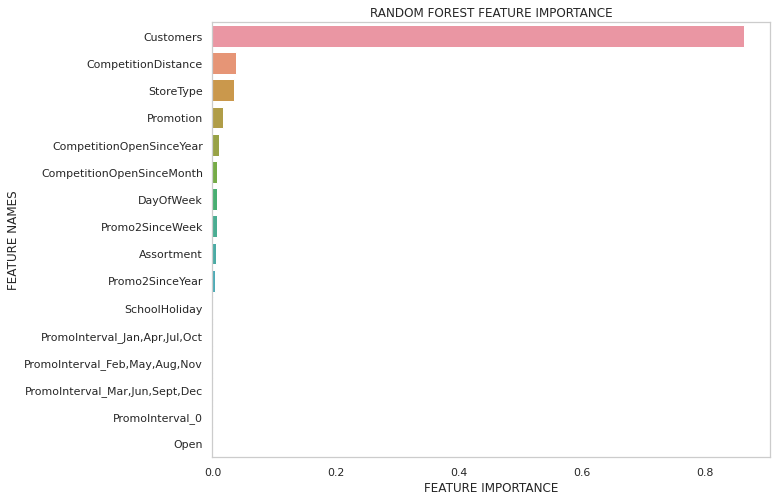

In [ ]:
columns=X2_train.columns
plot_feature_importance(rdf2.feature_importances_,columns[:],'RANDOM FOREST')

Customers,CompetitionDistance,StoreType,Promotion are some of the most important featueres

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# loading library
import pickle
pickle.dump(tree2, open('model.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X2_test)

array([7247.33333333, 6483.14285714, 7704.11111111, ..., 7730.16666667,
       5614.28571429, 2354.11111111])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Initially after performing merge the dataset had 1017209 rows and 20 columns.
2. For model 1 the data was manipulated and all the unnecessary columns and rows were dropped.844392 rows and 20 columns were used.
3. In Model 1:Linear Regression gave 76% accuracy,Decision Tree gave 78% accuracy,Decision Tree(Tuned) gave 96% accuracy and Random Forest gave 97% accuracy. So overall Random Forest performed better for Model 1.
4. For Model 2 the entire dataset was considered.1017209 rows 19 columns.
5. In Model 2:Linear Regression gave 86% accuracy,Decision Tree(Tuned) gave 97% accuracy and Random forest gave 98% accuracy.So overall Random forest performed better in Model 2 as well.
6. So overall it can be clearly seen that Model 2 is performing better than Model 1 which means removing rows where Sales was 0 also removed some informations.
7. So for the given dataset the Model 2 will perform better.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***